## PROBLEM STATEMENT

You own an ice cream business and you would like to create a model that could predict the daily revenue in dollars based on the outside air temperature (degC). You decide that a Linear Regression model might be a good candidate to solve this problem.  
Data set:
- Independant variable X: Outside Air Temperature
- Dependant variable Y: Overall daily revenue generated in dollars 

In [1]:
# Importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Getting the data
ice_data= pd.read_csv('IceCreamData.csv')

In [3]:
ice_data.head()

,Temperature,Revenue
0,24.566884,534.799028
1,26.005191,625.190122
2,27.790554,660.632289
3,20.595335,487.706960
4,11.503498,316.240194


In [4]:
ice_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 2 columns):
Temperature    500 non-null float64
Revenue        500 non-null float64
dtypes: float64(2)
memory usage: 7.9 KB


In [5]:
ice_data.describe()

,Temperature,Revenue
count,500.000000,500.000000
mean,22.232225,521.570777
std,8.096388,175.404751
min,0.000000,10.000000
25%,17.122258,405.558681
50%,22.392791,529.368565
75%,27.740674,642.257922
max,45.000000,1000.000000


Visualizing the data set

In [6]:
sns.set_style('darkgrid')

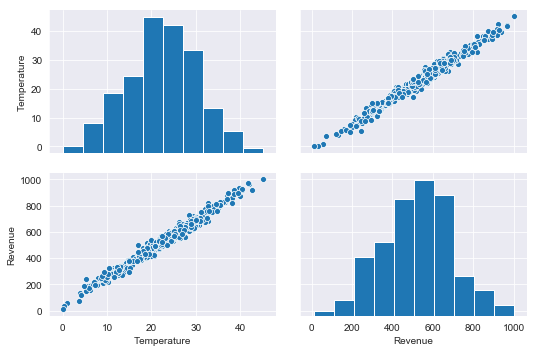

In [7]:
sns.pairplot(ice_data, aspect=1.5, height=2.5)

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


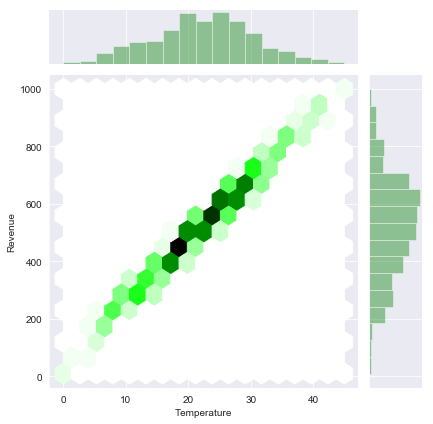

In [8]:
sns.jointplot(x='Temperature', y='Revenue', data=ice_data, kind='hex', color='g')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


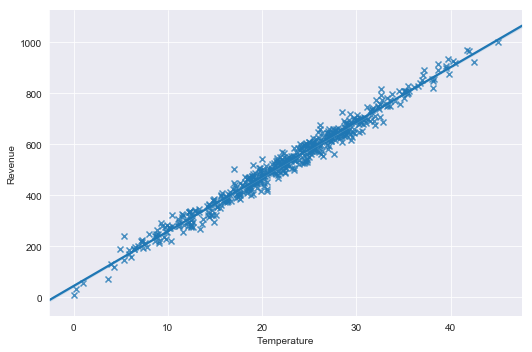

In [9]:
sns.lmplot(x='Temperature', y='Revenue', data=ice_data, aspect=1.5, markers='x')

Creating training and testing data

In [10]:
X= ice_data['Temperature'].values.reshape(-1,1)
y= ice_data['Revenue']

In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=80)

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(375, 1)
(375,)
(125, 1)
(125,)


Creating model and training model

In [14]:
from sklearn.linear_model import LinearRegression

In [15]:
lr= LinearRegression(fit_intercept=True)

In [16]:
lr_model= lr.fit(X_train, y_train)

In [17]:
lr_model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Intercept

In [18]:
print(lr_model.intercept_)

42.90266805087526


Coefficient

In [19]:
print(lr_model.coef_)

[21.47137319]


Testing the model

In [20]:
lr_predict= lr_model.predict(X_test)

In [21]:
lr_predict[:10]

array([ 508.91634003,  475.62266536, 1009.11446159,  568.62727855,
        569.57081829,  579.73809279,  392.9409046 ,  828.09178472,
        280.35665636,  291.8654453 ])

Text(0.5,1,'Actual Values')

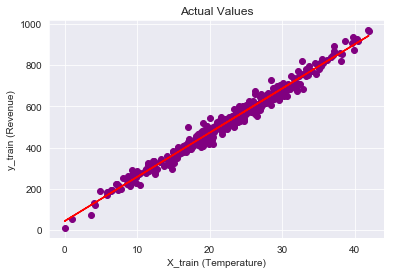

In [22]:
plt.scatter(X_train, y_train, color='purple')
plt.plot(X_train, lr_model.predict(X_train), color='r')
plt.xlabel('X_train (Temperature)')
plt.ylabel('y_train (Revenue)')
plt.title('Actual Values')

Text(0.5,1,'Testing Values')

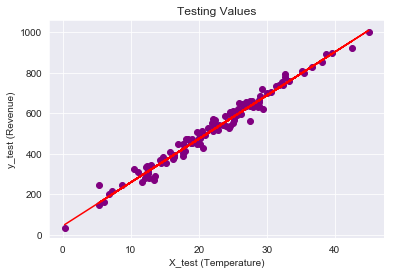

In [23]:
plt.scatter(X_test, y_test, color='purple')
plt.plot(X_test, lr_model.predict(X_test), color='r')
plt.xlabel('X_test (Temperature)')
plt.ylabel('y_test (Revenue)')
plt.title('Testing Values')

Text(0.5,1,'Revenue Predictions')

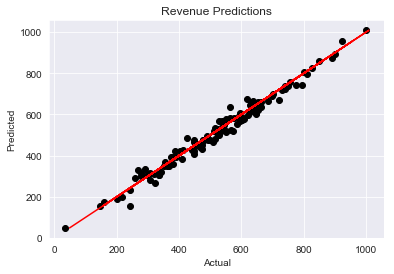

In [40]:
plt.scatter(y_test, lr_predict, color='black')
plt.plot(lr_predict, lr_predict, color='r')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Revenue Predictions')

In [25]:
from sklearn import metrics

In [26]:
print('MAE: ', metrics.mean_absolute_error(y_true=y_test, y_pred=lr_predict))
print('MSE: ', metrics.mean_squared_error(y_true=y_test, y_pred=lr_predict))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=lr_predict)))

MAE:  21.001193254559517
MSE:  701.0816838170529
RMSE:  26.477947122408356


Model Test

In [27]:
test_data= 13
test_predict= lr_model.predict(test_data)
test_predict

array([322.03051952])